In [ ]:
!pip install pyts
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import packages

In [ ]:
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot,GramianAngularField
import mne
import numpy as np

function to visualize any given recurerrance plot

In [ ]:
def visualize_reccurance_plot(X):
    for i in range(X.shape[0]):
        values = X[i]
        plt.imshow(values, cmap='rainbow', interpolation='nearest')
        plt.title('2-D Heat Map in Matplotlib')
        plt.colorbar()
        plt.show()

function to extract different annotation of the eeg graph like T0,T1,T2 and store it as a dictionary

In [ ]:
def annotation_extracter(raw_data, description, onset, duration):
    extract_data = {'T0': [], 'T1': [], 'T2': []}
    for i in range(len(description)):
        # we are using int of duration because the activities take 4.1 and 4.2 sec, so to avoid difference in dimensions
        sample_array = raw_data[:, int((onset[i]) * 160):int((onset[i] + int(duration[i])) * 160)]
        extract_data[description[i]].append(sample_array)
    return extract_data

In [ ]:
def find_channel_index(channel_names, required_channels):
    chn_index = []
    for i in range(len(channel_names)):
        if channel_names[i] in required_channels:
            chn_index.append(i)
    return chn_index

convert raw data to recurrance plot

In [ ]:
def signal_to_plot(raw_data, channels):
    new_data = raw_data[channels]
    transformer = GramianAngularField()
    X_new = transformer.transform(new_data)
    return X_new

function to plot the eeg signal as a graph

In [ ]:
def plot_eeg(raw_data):
    plt.plot(np.array(range(raw_data.shape[1]))/160,raw_data.T)
    plt.show()

reading the edf file

In [ ]:
file = "S004R04.edf"
data = mne.io.read_raw_edf(file)

Extracting EDF parameters from /content/S004R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


getting the required channels index

In [ ]:
required = ['Fc5.', 'Fc1.', 'Fcz.', 'Fc2.', 'C3..', 'Cz..', 'C4..']

chn_index = find_channel_index(data.ch_names, required)
chn_index

[0, 2, 3, 4, 8, 10, 12]

In [ ]:
raw_data = data.get_data()
extracted_data = annotation_extracter(raw_data,data.annotations.description,data.annotations.onset,data.annotations.duration)
print(data.annotations.duration)

[4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1
 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1]


In [ ]:
plot_eeg(extracted_data['T0'][0][chn_index])

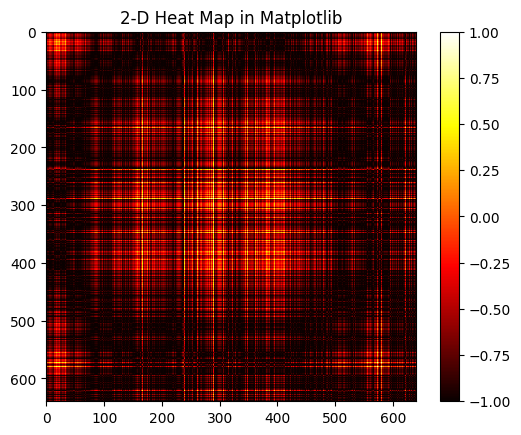

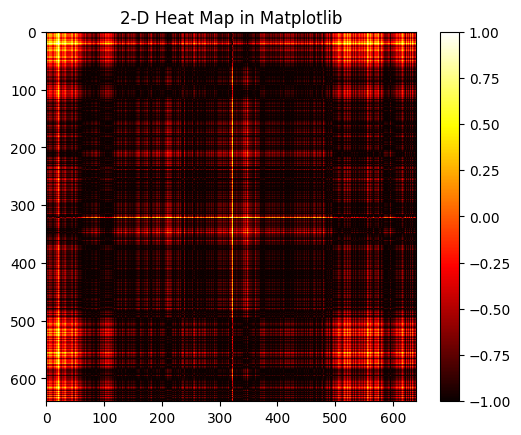

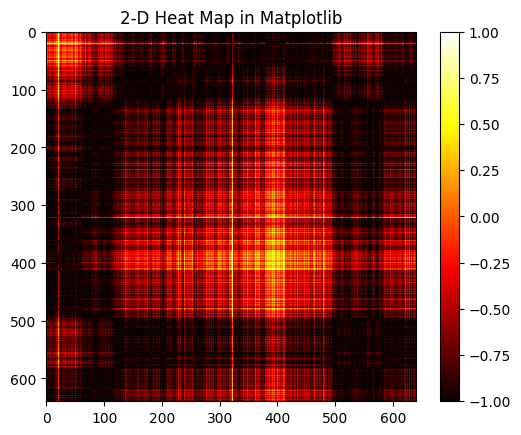

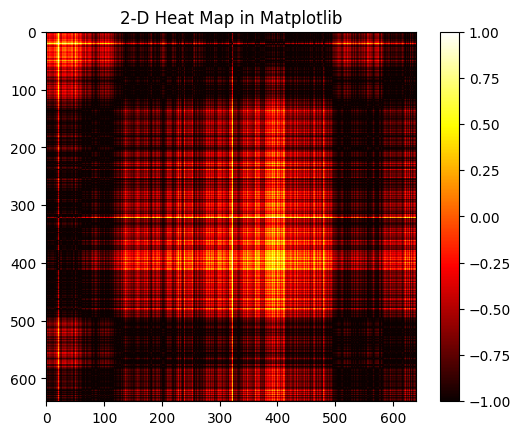

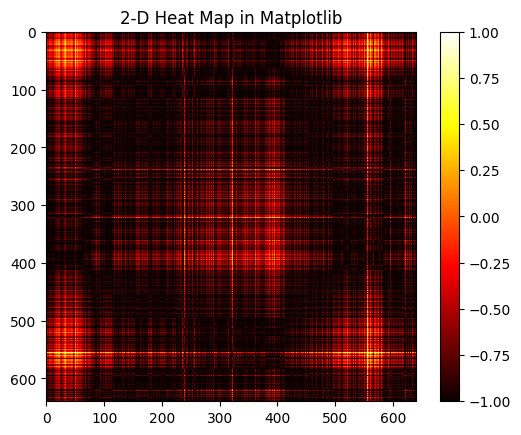

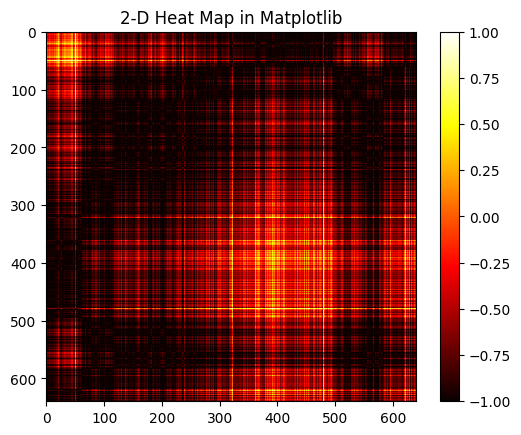

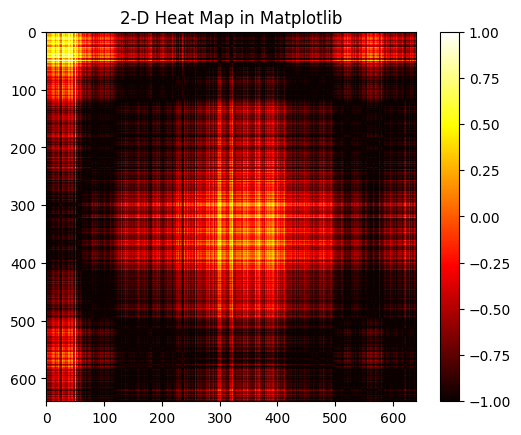

In [ ]:
recc_plot = signal_to_plot(extracted_data['T1'][0],chn_index)
visualize_reccurance_plot(recc_plot)